# Step 1: Import necessary libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Step 2: Load the dataset

In [4]:
df = pd.read_csv("c:\\Users\\Administrator\\Downloads\\Housing-3.csv")


# Step 3: Data Exploration and Preprocessing

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# check for missing values
missing_values=df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
df.dropna(inplace=True)

In [9]:
# Convert categorical variables to numeric using one-hot encoding
dataset=pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Step 4: Define the target and input features

In [10]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = dataset['price']

# Step 5: Data Splitting

In [12]:
x_test,x_train,y_test,y_train=train_test_split(X,y, test_size=0.2, random_state=125)

# Step 6: Linear Regression Modeling

In [13]:
# train the model

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Step 7: Model Evaluation

In [14]:
# make prediction on testing data
y_pred=model.predict(x_test)

In [17]:
# evaluate the model's preformance

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 1417962179435.07
R-squared: 0.60


# Step 8: Visualization

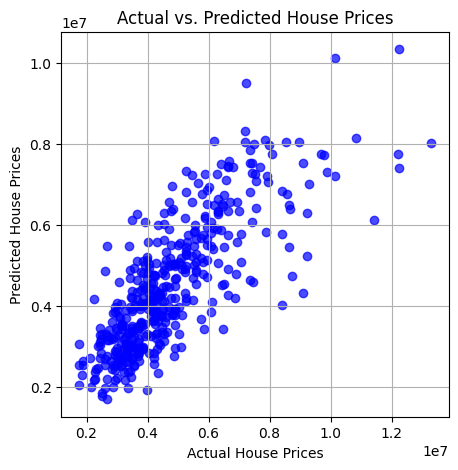

In [18]:
# Step 8: Visualization
# Visualize the actual( vs. predicted house prices using a scatterplot
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,color='blue',alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Step 9: Interpretation

In [19]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coafficients=model.coef_
intercept=model.intercept_
print("Coefficients (Slopes):")


for feature,coef in zip(X.columns,coafficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 196.95
bedrooms: -188327.66
bathrooms: 1045109.74
stories: 678770.74
parking: 292306.91
mainroad_yes: 417265.23
guestroom_yes: 774580.88
basement_yes: 85392.74
hotwaterheating_yes: 563357.67
airconditioning_yes: 858299.24
prefarea_yes: 1060896.11
furnishingstatus_semi-furnished: 129626.78
furnishingstatus_unfurnished: -221763.81
Intercept: 282085.57
